Тема 7: Метод чутливого розташування хешування в системах машинного навчання
Застосувати LSH до одного з датасетів
https://www.kaggle.com/datasets?search=image+classification, порівняти із результатами класифікації
за допомогою будь-якого іншого з раніше реалізованих алгоритмів

In [9]:
import os
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from sklearn.random_projection import SparseRandomProjection
from sklearn.preprocessing import LabelEncoder


In [10]:
base_dir = "./archive/train"  # Папка з усіма зображеннями
csv_path = "./archive/Training_set.csv"  # Шлях до CSV-файлу
img_size = (64, 64)  # Розмір для масштабування

data = pd.read_csv(csv_path)

images = []
labels = []

In [11]:

for idx, row in data.iterrows():
    file_name = row['filename']
    label = row['label']
    file_path = os.path.join(base_dir, file_name)

    if os.path.exists(file_path):
        # Загружаем и обрабатываем изображение
        img = load_img(file_path, target_size=img_size)
        img_array = img_to_array(img) / 255.0  # Нормализация
        images.append(img_array)
        labels.append(label)
    else:
        print(f"{file_path} not found!")

In [12]:
images = np.array(images)
labels = np.array(labels)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


images_flattened = images.reshape(images.shape[0], -1)

In [13]:
class LSH:
    def __init__(self, n_projections=10):
        self.n_projections = n_projections
        self.projections = SparseRandomProjection(n_components=n_projections)
        self.hash_tables = {}

    def fit(self, data):
        projected_data = self.projections.fit_transform(data)
        self.hash_tables = self._create_hash_table(projected_data)

    def _create_hash_table(self, projected_data):
        hash_table = {}
        for idx, vector in enumerate(projected_data):
            key = tuple((vector > 0).astype(int))  
            if key not in hash_table:
                hash_table[key] = []
            hash_table[key].append(idx)
        return hash_table

    def query(self, data_point, top_k=5):
        vector = self.projections.transform([data_point])[0]
        key = tuple((vector > 0).astype(int))
        candidates = self.hash_tables.get(key, [])
        return candidates

In [18]:
lsh = LSH(n_projections=15)
lsh.fit(images_flattened)

# Шаг 9: Поиск похожих изображений
query_image_idx = 0  # Выбираем первое изображение как запрос
query_image = images_flattened[query_image_idx]

print("Searching for similar images...")
similar_indices = lsh.query(query_image, top_k=5)

print("Indices of similar images:", similar_indices)

Searching for similar images...
Indices of similar images: [0, 12, 76, 102, 105, 136, 227, 317, 430, 503, 609, 614, 681, 698, 709, 834, 875, 902, 910, 914, 924, 1033, 1112, 1295, 1375, 1434, 1520, 1531, 1641, 1666, 1670, 1799, 1807, 1915, 1945, 1992, 1994, 2030, 2053, 2079, 2177, 2301, 2319, 2371, 2407, 2421, 2490, 2499, 2542, 2546, 2548, 2571, 2574, 2629, 2632, 2746, 2869, 2945, 2972, 3044, 3078, 3138, 3142, 3147, 3165, 3186, 3239, 3251, 3270, 3446, 3522, 3545, 3557, 3579, 3712, 3940, 4002, 4093, 4343, 4362, 4466, 4476, 4604, 4643, 4644, 4655, 4722, 5085, 5136, 5150, 5162, 5214, 5226, 5234, 5281, 5293, 5314, 5371, 5380, 5464, 5482, 5511, 5523, 5529, 5574, 5578, 5619, 5633, 5646, 5661, 5700, 5769, 5796, 5824, 5831, 5866, 6078, 6103, 6121, 6136, 6165, 6177, 6207, 6220, 6222, 6273, 6291, 6350, 6380, 6401, 6442, 6480]


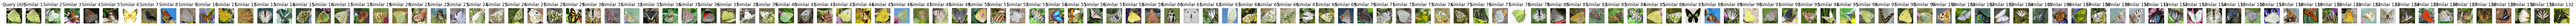

In [19]:
plt.figure(figsize=(100, 30))  

# Show the "query"
plt.subplot(1, len(similar_indices) + 1, 1)
plt.imshow(images[query_image_idx])
plt.title("Query (All)")
plt.axis('off')

# Show found images
for i, idx in enumerate(similar_indices):
    plt.subplot(1, len(similar_indices) + 1, i + 2)
    plt.imshow(images[idx])
    plt.title(f"Similar {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Indices of similar images (MONARCH): [0, 20, 31, 37, 40, 48, 51, 65, 78, 81]


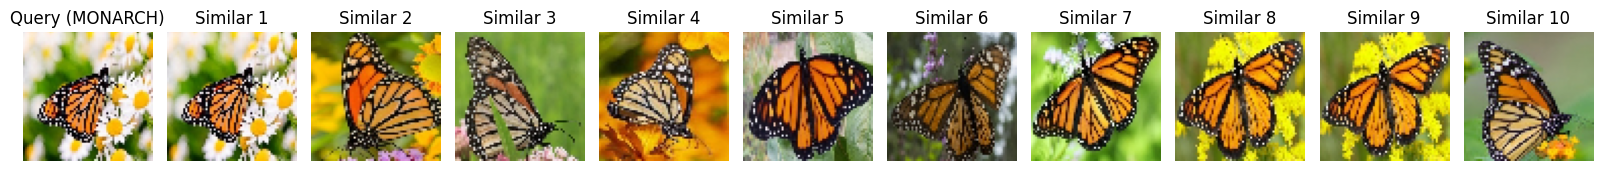

In [20]:

filtered_indices = [i for i, label in enumerate(labels) if label == "MONARCH"]
filtered_images = images_flattened[filtered_indices]
filtered_labels = labels[filtered_indices]

lsh_monarch = LSH(n_projections=15)
lsh_monarch.fit(filtered_images)

demo_image_idx = 0
query_image_monarch = filtered_images[demo_image_idx]

similar_indices_monarch = lsh_monarch.query(query_image_monarch, top_k=5)

print("Indices of similar images (MONARCH):", similar_indices_monarch)


plt.figure(figsize=(16, 8))  

# Show the "query"
plt.subplot(1, len(similar_indices_monarch) + 1, 1)
plt.imshow(images[filtered_indices[demo_image_idx]])
plt.title("Query (MONARCH)")
plt.axis('off')

# Show found images
for i, idx in enumerate(similar_indices_monarch):
    plt.subplot(1, len(similar_indices_monarch) + 1, i + 2)
    plt.imshow(images[filtered_indices[idx]])
    plt.title(f"Similar {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()